# Showering in new muon sample (10k muons)
In this notebook, we aim to study the showering of high-charge particles (i.e. neutrons) cause by the rock that surrounds the main volume.

In particular, we would highlight the showering effect. Please note:
1. The **higher number of neutrons** (count tracknumber, not entries) in the new geometry.
1. The **higher kinetic energy** (KE) of neutrons in the new geometry.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os, numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [24]:
# Load old and new dataset
filepath_pilot100 = os.path.join("..", "Data", "output_Muon_123456789.csv")
filepath_old10k = os.path.join("..", "Data", "output_Muon_10000.csv")
filepath_new = os.path.join("..", "Data", "output_Muon_10237333.csv")
df100 = pd.read_csv(filepath_pilot100, index_col=False).sort_values("time")
df10k = pd.read_csv(filepath_old10k, index_col=False).sort_values("time")
dfnew = pd.read_csv(filepath_new, index_col=False).sort_values("time")

# For each neutron (i.e. tracknumber), consider the first entry w.r.t. time
neutrons100 = df100[(df100.kineticenergy>0) & (df100.PID==2112)].groupby(["eventnumber", "tracknumber"]).first().reset_index()
neutrons10k = df10k[(df10k.kineticenergy>0) & (df10k.PID==2112)].groupby(["eventnumber", "tracknumber"]).first().reset_index()
neutronsnew = dfnew[(dfnew.kineticenergy>0) & (dfnew.PID==2112)].groupby(["eventnumber", "tracknumber"]).first().reset_index()

print("[Pilot  100 - Vertical Muons] Neutron tracks: {}, Total entries: {}".format(len(neutrons100), len(df100)))
print("[Pilot  10k - MUSUN Muons] Neutron tracks: {}, Total entries: {}".format(len(neutrons10k), len(df10k)))
print("[Full,1File - MUSUN+Rock] Neutron tracks: {}, Total entries: {}".format(len(neutronsnew), len(dfnew)))

[Pilot  100 - Vertical Muons] Neutron tracks: 36, Total entries: 333262
[Pilot  10k - MUSUN Muons] Neutron tracks: 459, Total entries: 1792342
[Full,1File - MUSUN+Rock] Neutron tracks: 381, Total entries: 1683732


No handles with labels found to put in legend.


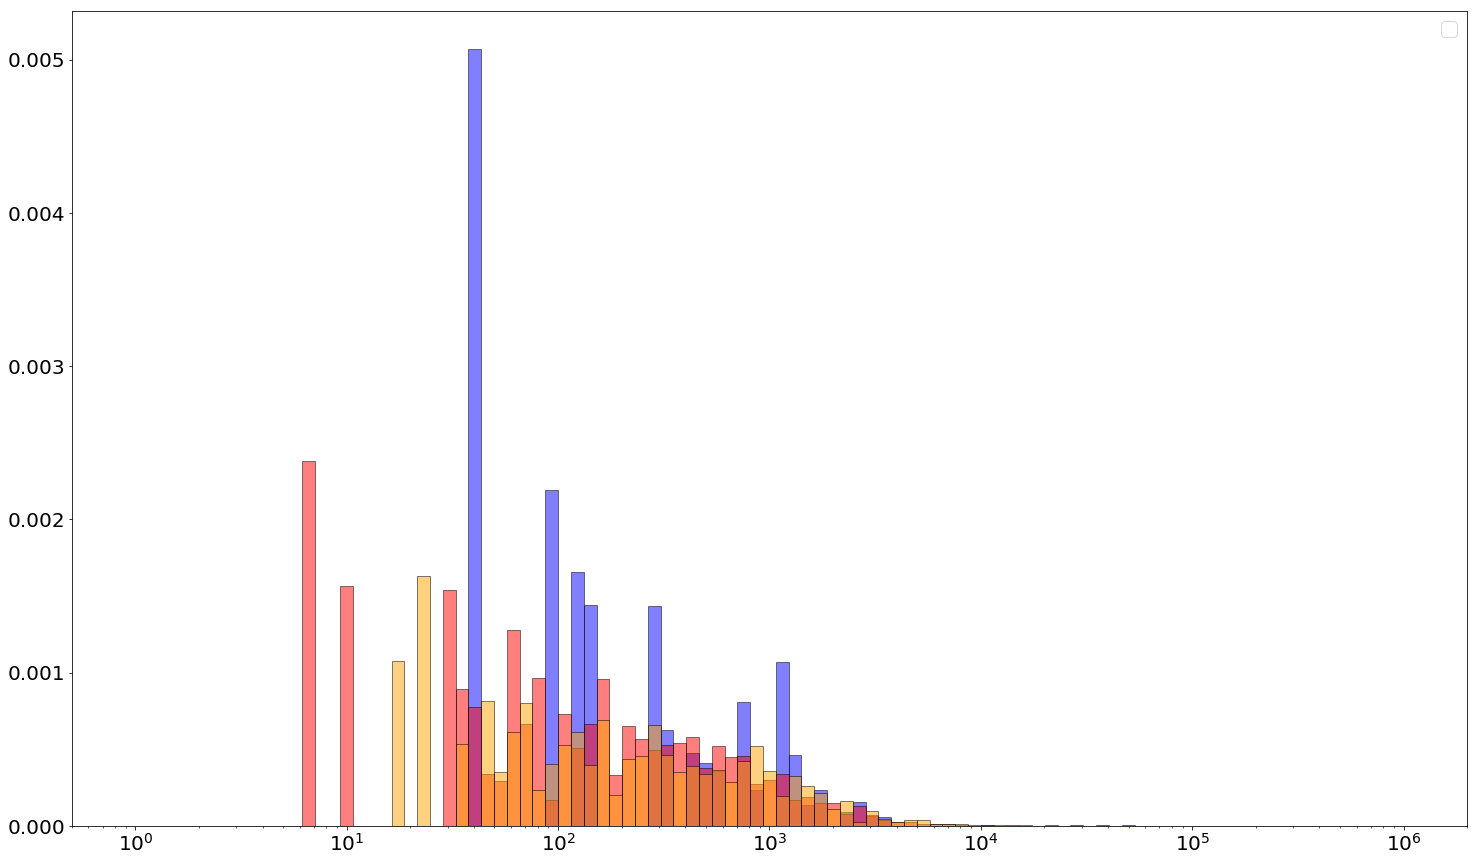

,count,mean,std,min,25%,50%,75%,max
Vert+NoRock,36.0,8617.918232,27728.755407,0.301437,471.39625,1153.545,1934.8925,157025.0
MUS+Rock?,459.0,14407.745832,147560.706657,0.000054,431.80700,1087.100,2679.9750,3113610.0
MUS+Rock,381.0,7256.941785,26020.424212,0.001250,589.95700,1321.870,2895.5800,300172.0


In [35]:
stat100 = neutrons100.kineticenergy.describe()
stat10k = neutrons10k.kineticenergy.describe()
statnew = neutronsnew.kineticenergy.describe()
stat=pd.DataFrame([stat100, stat10k, statnew], index=["Vert+NoRock", "MUS+Rock?", "MUS+Rock"])

old_high_neutrons = neutrons_old
new_high_neutrons = neutrons_new[neutrons_new.kineticenergy < 160000]

bins = np.logspace(0, 6, 100)
alpha = 0.5
plt.hist(neutrons100.kineticenergy, bins, color='b', edgecolor='k', alpha=alpha, density=True)
plt.hist(neutrons10k.kineticenergy, bins, color='r', edgecolor='k', alpha=alpha, density=True)
plt.hist(neutronsnew.kineticenergy, bins, color='orange', edgecolor='k', alpha=alpha, density=True)
plt.xscale('log')
#ma, mean, std, p50, p75 = stat.loc['old_geom', ['max', 'mean', 'std', '50%', '75%']]
#label = "max: {:.2f},\n" \
#        "mean: {:.2f}, std: {:.2f}\n"  \
#        "50%: {:.2f}, 75%: {:.2f}".format(ma, mean, std, p50, p75)
#plt.text(80000, 0.0002, label)
#plt.title("Old Geometry")
#plt.xlim(0, 160000)

#ma, mean, std, p50, p75 = stat.loc['geom+rock', ['max', 'mean', 'std', '50%', '75%']]
plt.legend()
plt.show()
stat

## Observations:
1. The new dataset contains entries related to 884 events. CJ said to have simulated 10k muons, then I expect that most of them doesn't enter in the LAr volume, maybe cross the water volume. **Does it depend on the MUSUN angles?** In this setting <10% of simulation effort lead to depositions in the LAr.
1. In the old dataset, there were `42` neutron tracks, whilst in the new dataset, there are `552`. If the number of neutron tracks has scaled linearly, we expect a number of tracks ~ `42*9=378`. Instead, the number of neutron tracks is `552 >> 378`. **This increase of neutrons confirms the showering effect caused by rocks.**
1. The introduction of showering changes the KE distribution. We notice a lot of **high-energy neutrons** as shown in the plot and the table above.

In [36]:
nneutrons100 = df100[df100.PID==2112].groupby(["eventnumber", "tracknumber"]).count()
nneutrons100.head()

PID  ParentTrackID  energydeposition  kineticenergy  \
eventnumber tracknumber                                                        
0           129            1              1                 1              1   
            130            1              1                 1              1   
            1198           5              5                 5              5   
            1199           1              1                 1              1   
            1201          16             16                16             16   

                         time   x   y   z  px  py  ...  detectornumber  \
eventnumber tracknumber                            ...                   
0           129             1   1   1   1   1   1  ...               1   
            130             1   1   1   1   1   1  ...               1   
            1198            5   5   5   5   5   5  ...               5   
            1199            1   1   1   1   1   1  ...               1   
            1201           16  16  16  16  16  16  ...              16   

                         creatorprocess  startx  starty  startz  randomseed  \
eventnumber tracknumber                                                       
0           129                       1       1       1       1           1   
            130                       1       1       1       1           1   
            1198                      5       5       5       5           5   
            1199                      1       1       1       1           1   
            1201                     16      16      16      16          16   

                         parentnucleusPID  nuclearx  nucleary  nuclearz  
eventnumber tracknumber                                                  
0           129                         1         1         1         1  
            130                         1         1         1         1  
            1198                        5         5         5         5  
            1199                        1         1         1         1  
            1201                       16        16        16        16  

[5 rows x 30 columns]

In [37]:
nneutrons10k = df10k[df10k.PID==2112].groupby(["eventnumber", "tracknumber"]).count()
nneutrons10k.head()

PID  ParentTrackID  energydeposition  kineticenergy  \
eventnumber tracknumber                                                        
160         15139         14             14                14             14   
            15140         31             31                31             31   
240         5469           2              2                 2              2   
            5472           4              4                 4              4   
            6663           3              3                 3              3   

                         time   x   y   z  px  py  pz  creatorprocess  \
eventnumber tracknumber                                                 
160         15139          14  14  14  14  14  14  14              14   
            15140          31  31  31  31  31  31  31              31   
240         5469            2   2   2   2   2   2   2               2   
            5472            4   4   4   4   4   4   4               4   
            6663            3   3   3   3   3   3   3               3   

                         parentnucleusPID  
eventnumber tracknumber                    
160         15139                      14  
            15140                      31  
240         5469                        2  
            5472                        4  
            6663                        3

In [39]:
nneutronsnew = dfnew[dfnew.PID==2112].groupby(["eventnumber", "tracknumber"]).count()
nneutronsnew.head()

PID  ParentTrackID  energydeposition  kineticenergy  \
eventnumber tracknumber                                                        
202         3689           2              2                 2              2   
            3691           5              5                 5              5   
            3693           1              1                 1              1   
1202        2114           3              3                 3              3   
            15911          4              4                 4              4   

                         time  x  y  z  px  py  pz  creatorprocess  \
eventnumber tracknumber                                              
202         3689            2  2  2  2   2   2   2               2   
            3691            5  5  5  5   5   5   5               5   
            3693            1  1  1  1   1   1   1               1   
1202        2114            3  3  3  3   3   3   3               3   
            15911           4  4  4  4   4   4   4               4   

                         parentnucleusPID  
eventnumber tracknumber                    
202         3689                        2  
            3691                        5  
            3693                        1  
1202        2114                        3  
            15911                       4

# MUSUN input files
In this section, we aim to see the angle and energy distribution from MUSUN, that is later used to feed the CJ simulation.

In [10]:
import os, pandas as pd
column_names = ["nrow", "muon+-", "E", "x", "y", "z", "theta", "phi"]
musun_dir = os.path.join("..", "Data", "musun")
musun = pd.read_csv(os.path.join(musun_dir, "musun1000000.dat"), sep='\s+', names=column_names)
musun.head()

,nrow,muon+-,E,x,y,z,theta,phi
0,1,10,75.4,-277.8,600.0,-219.9,0.8497,3.4650
1,2,10,69.9,-600.0,-282.3,-330.9,0.4977,6.2527
2,3,11,130.0,-600.0,277.1,265.7,0.5240,0.9938
3,4,11,64.4,500.9,-220.5,650.0,0.4951,2.8159
4,5,11,39.3,515.7,-480.0,650.0,0.6320,2.6273


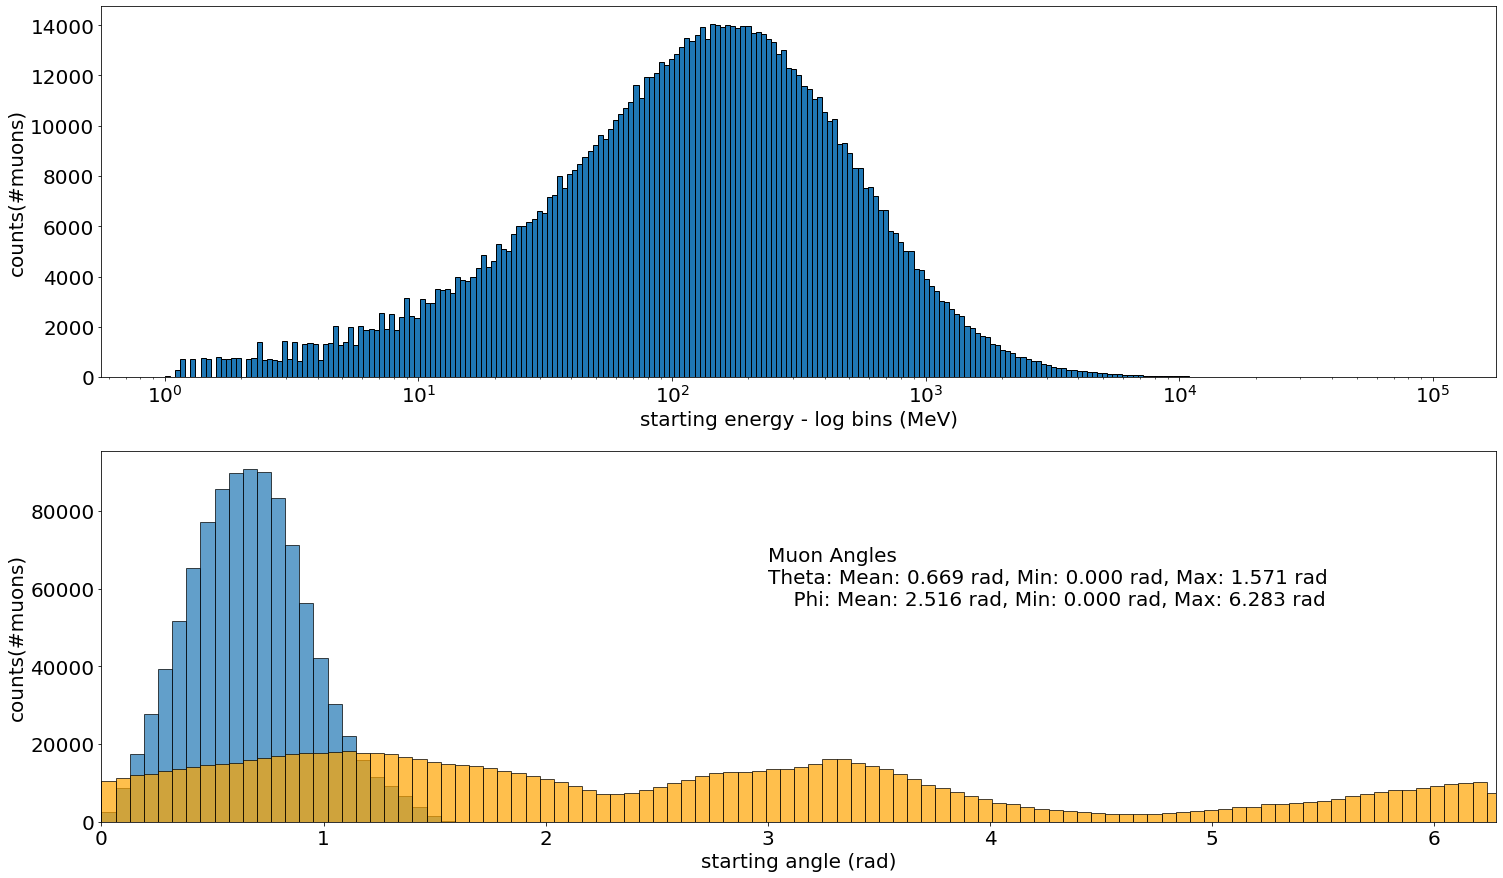

In [64]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

energy_stats = musun.E.describe()
bins = np.logspace(0, 5, 250)
plt.subplot(2, 1, 1)
plt.hist(musun.E, bins=bins, edgecolor='k')
plt.xscale('log')
plt.xlabel("starting energy - log bins (MeV)")
plt.ylabel("counts(#muons)")
#plt.text(20000, 400000, "Muon Starting energy\n" \
#                        "Mean: {:.3f} MeV, Min: {:.3f} MeV, Max: {:.3f} MeV".format(energy_stats.loc["mean"], 
#                                                                                     energy_stats.loc["min"], 
#                                                                                     energy_stats.loc["max"]))

phi_stats = musun.phi.describe()
plt.subplot(2, 1, 2)
alpha = 0.7
bins = np.linspace(0, 6.3, 100)
plt.hist(musun.theta, bins=bins, alpha=alpha, label="Theta", edgecolor='k')
plt.hist(musun.phi, bins=bins, alpha=alpha, label="Phi", edgecolor='k', color='orange')
plt.xlabel("starting angle (rad)")
plt.ylabel("counts(#muons)")
plt.xlim(0, 6.28)
plt.text(3, 50000, "Muon Angles\n" \
                     "Theta: Mean: {:.3f} rad, Min: {:.3f} rad, Max: {:.3f} rad\n  " \
                     "  Phi: Mean: {:.3f} rad, Min: {:.3f} rad, Max: {:.3f} rad\n".format(theta_stats.loc["mean"], 
                                                                                        theta_stats.loc["min"], 
                                                                                        theta_stats.loc["max"],
                                                                                        phi_stats.loc["mean"], 
                                                                                        phi_stats.loc["min"], 
                                                                                        phi_stats.loc["max"]))


plt.show()